In [ ]:
import matplotlib.pyplot as plt

# Data Mining

## Integrating data mining with matplotlib


### Using Decision Trees for classification

### Exercise
https://www.analyticsvidhya.com/blog/2021/12/anomaly-detection-model-using-facebook-prophet/ 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False



In [8]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [9]:
print(data.shape)
data.head()

(10320, 2)


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [10]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [11]:
data = data.set_index('timestamp').resample('H').mean().reset_index()
data.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


Data visualisation

In [13]:
#express to plot entire data
fig = px.line(data.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward")
        ])
    )
)
fig.show()


c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [17]:
from prophet import Prophet
taxi_df = data.reset_index()[['timestamp', 'value']].rename({'timestamp':'ds', 'value':'y'}, axis='columns')
taxi_df.head()

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [18]:
#train test split
train = taxi_df[(taxi_df['ds'] >= '2014-07-01') & (taxi_df['ds'] <= '2015-01-27')]
test = taxi_df[(taxi_df['ds'] > '2015-01-27')]

#create Prophet model
m = Prophet(changepoint_range=0.95)
m.fit(train)

# forecast on future data
future = m.make_future_dataframe(periods=119, freq='H')
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:30 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23763.849551,19303.593052,28376.415408
5156,2015-01-31 20:00:00,24327.901925,19391.094209,29101.717391
5157,2015-01-31 21:00:00,23204.600286,18393.682027,28367.256664
5158,2015-01-31 22:00:00,21012.621437,16360.460797,25655.405354
5159,2015-01-31 23:00:00,18485.424775,13557.172659,23229.276801


c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\prophet\plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



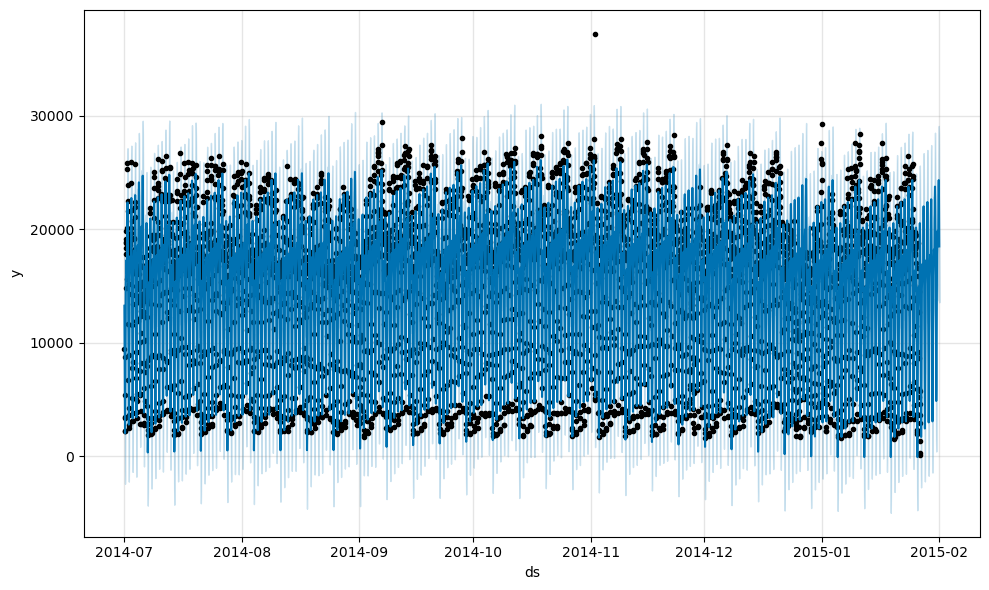

In [19]:
## visualise residuals
result = pd.concat([taxi_df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
fig1 = m.plot(forecast)

The black points are the actual outcomes(target), dark blue points are the predicted points.

c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\prophet\plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\prophet\plot.py:395: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\prophet\plot.py:399: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\User

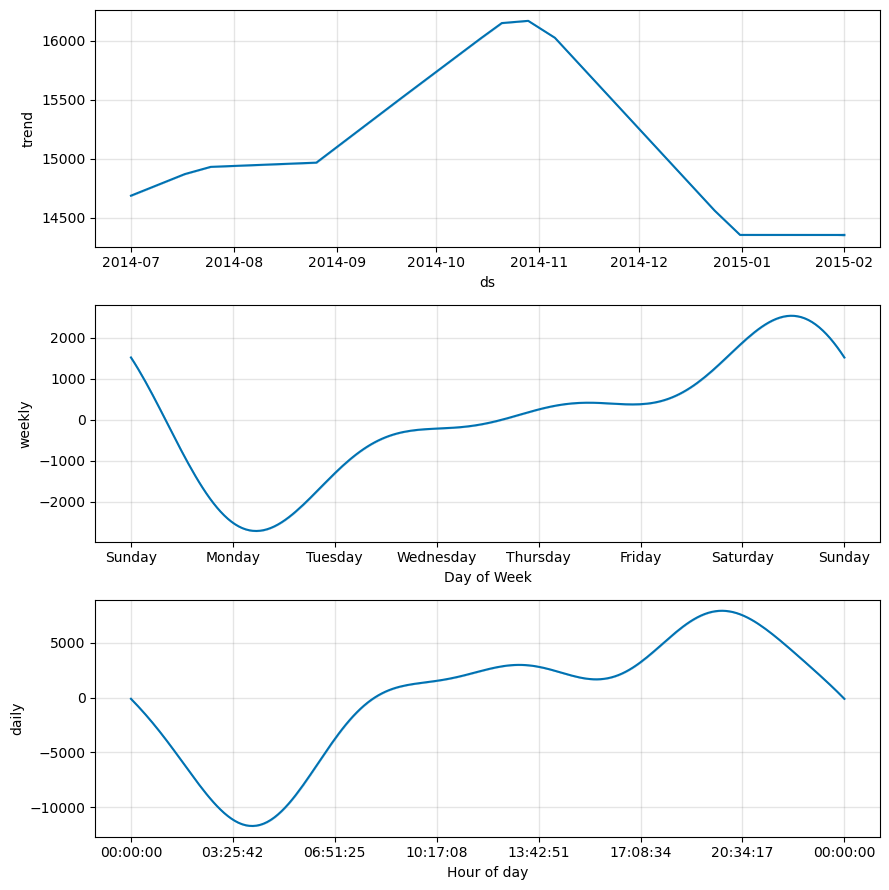

In [20]:
comp = m.plot_components(forecast)

In [21]:
# Anomaly and outlier detection
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

In [22]:
result[result['error'].abs() > 1.5*result['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-11-02 01:00:00,37204.5,14225.502427,9485.230724,19034.699293,22978.997573,9549.468568
2015-01-01 01:00:00,29292.0,11404.858235,6594.827613,16177.365000,17887.141765,9582.537387
2015-01-01 02:00:00,25753.5,7769.317863,2650.299490,12473.214496,17984.182137,9822.915006
2015-01-01 03:00:00,22067.0,4478.128930,-203.634986,9121.412229,17588.871070,9325.047216
2015-01-26 19:00:00,4565.5,19758.942605,14853.943879,24643.232714,-15193.442605,9789.288835
2015-01-26 20:00:00,3630.5,20534.184063,15631.310514,25610.309046,-16903.684063,9978.998532
2015-01-26 21:00:00,2907.0,19635.266740,14696.239574,24480.648685,-16728.266740,9784.409111
2015-01-26 22:00:00,1324.5,17679.457807,12546.657418,22571.615817,-16354.957807,10024.958399
2015-01-26 23:00:00,243.0,15398.746263,10469.966438,20401.715941,-15155.746263,9931.749504


In [24]:
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)
#result['anomaly'] = np.where(np.abs(x['error']) > 1.5*x['uncertainty']), 'Yes', 'No') #Alternate way
result.head()

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13259.640008,8261.086014,18005.649899,-3774.140008,9744.563884,No
2014-07-01 01:00:00,5433.0,10251.280296,5538.376495,14953.133792,-4818.280296,9414.757297,No
2014-07-01 02:00:00,3346.5,6687.796699,1706.973706,11556.115082,-3341.296699,9849.141376,No
2014-07-01 03:00:00,2216.5,3466.675812,-1267.977873,8087.521374,-1250.175812,9355.499247,No
2014-07-01 04:00:00,2189.5,2035.973866,-2428.123557,6843.402888,153.526134,9271.526445,No


In [25]:
#visualize the anomaly data
fig = px.scatter(result.reset_index(), x='ds', y='y', color='anomaly', title='NYC Taxi Demand')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='3y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()


c:\Users\au228742\Miniconda3\envs\Python2_course\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

